In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Log Transform

C:\Users\rsurs\AppData\Local\Temp\ipykernel_31168\990983892.py:4: RuntimeWarning: divide by zero encountered in log
  log_image = c * np.log(1 + image)


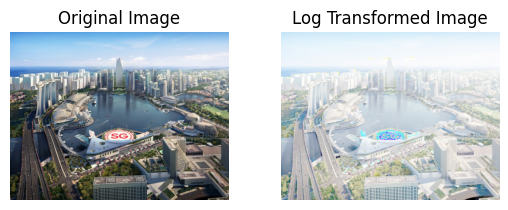

In [3]:
image = cv2.imread('mbs.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
c = 255 / np.log(1+np.max(image))
log_image = c * np.log(1 + image)
log_image = np.array(log_image,dtype=np.uint8)
plt.subplot(2,2,1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(log_image)
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()

Gamma Transform

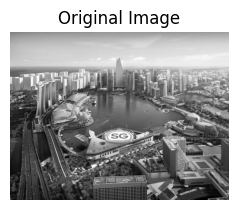

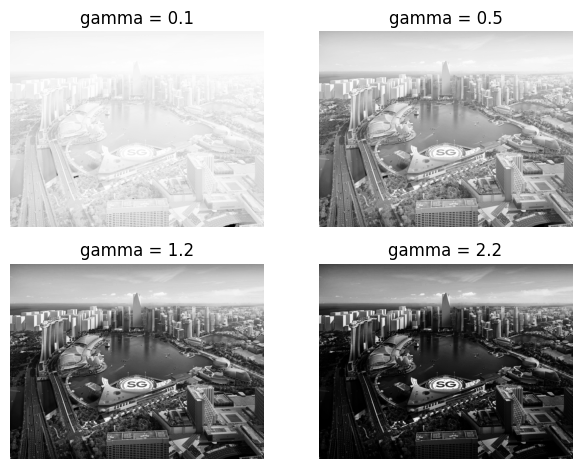

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('mbs.jpg', cv2.IMREAD_GRAYSCALE)
gamma = [0.1, 0.5, 1.2, 2.2]

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

for i, gamma_value in enumerate(gamma):
    gamma_transform = np.array(255 * (image / 255) ** gamma_value, dtype='uint8')
    plt.subplot(2, 2, i +1)
    plt.imshow(gamma_transform, cmap='gray')
    plt.title(f'gamma = {gamma_value}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Contrast streching 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


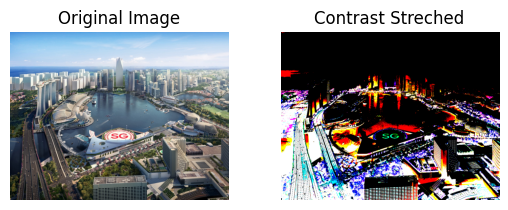

<Figure size 640x480 with 0 Axes>

In [5]:
image = cv2.imread('mbs.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

def pixelValue(pix,r1,r2,s1,s2):
    if 0 <= pix and pix <= r1:
        return (s1/r1)*pix
    elif r1 < pix and pix > r2:
        return ((s2 - s1)/(r2 - r1)) * (pix * r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

r1 = 70
s1 = 0
r2 = 140
s2 = 255 
pixVal_vec = np.vectorize(pixelValue)
contrast_stretch = pixVal_vec(image,r1,s1,r2,s2)
plt.subplot(2,2,1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(contrast_stretch)
plt.title('Contrast Streched')
plt.axis('off')
plt.show()
plt.tight_layout()



Histogram Equalization

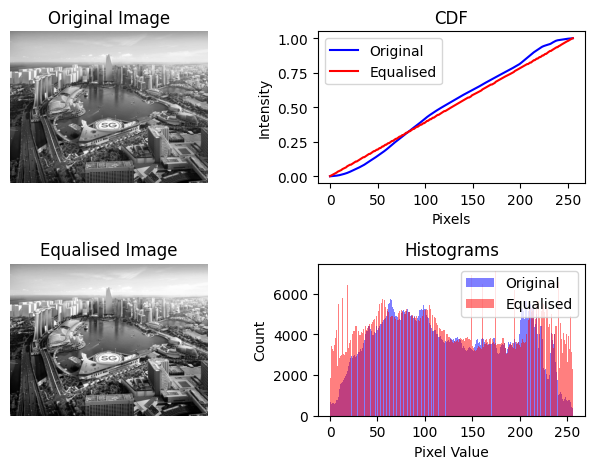

In [25]:
image = cv2.imread('mbs.jpg',cv2.IMREAD_GRAYSCALE)
original_hist,original_bins = np.histogram(image.flatten(),bins=256,range=(0,256))
equ = cv2.equalizeHist(image)
equ_hist,equ_bins = np.histogram(equ.flatten(),bins=256,range=(0,256))
original_normalized_cdf = original_hist.cumsum()/original_hist.sum()
equ_normalized_cdf = equ_hist.cumsum()/equ_hist.sum()
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.plot(original_normalized_cdf,c='b',alpha=1,label='Original')
plt.plot(equ_normalized_cdf,c='r',alpha=1,label='Equalised')
plt.title('CDF')
plt.xlabel('Pixels')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2,2,3)
plt.imshow(equ,cmap='gray')
plt.axis('off')
plt.title('Equalised Image')

plt.subplot(2,2,4)
plt.hist(image.flatten(),bins=256,range=(0,256),color='b',alpha=0.5,label='Original')
plt.hist(equ.flatten(),bins=256,range=(0,256),color='r',alpha=0.5,label='Equalised')
plt.title('Histograms')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

